# SVM - Support Vector Machines with PCA for reducing the dimensions

### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,OrdinalEncoder
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.decomposition import PCA
import os
import warnings
warnings.filterwarnings('ignore')

### Importing Data Set, X and Y
    1. X is stored as vector array of images
    2. Y is classification stored in 0-9 i.e 10 different classes

In [2]:
os.listdir('/kaggle/input/sign-language-digits-dataset')

['Sign-language-digits-dataset', 'Y.npy', 'X.npy']

In [3]:
X = np.load('/kaggle/input/sign-language-digits-dataset/X.npy')
Y = np.load('/kaggle/input/sign-language-digits-dataset/Y.npy')

### Shape of the features and target

In [4]:
# Shape
print(X.shape) #2062 samples 64*64 pixels
print(Y.shape) #2062 rows 10 classes

(2062, 64, 64)
(2062, 10)


### Visualizing the Images

The 260,900,1800,1600,1400,2061,700,500,1111,100 represents the index of the induvidual digit for displaying the sample for each class

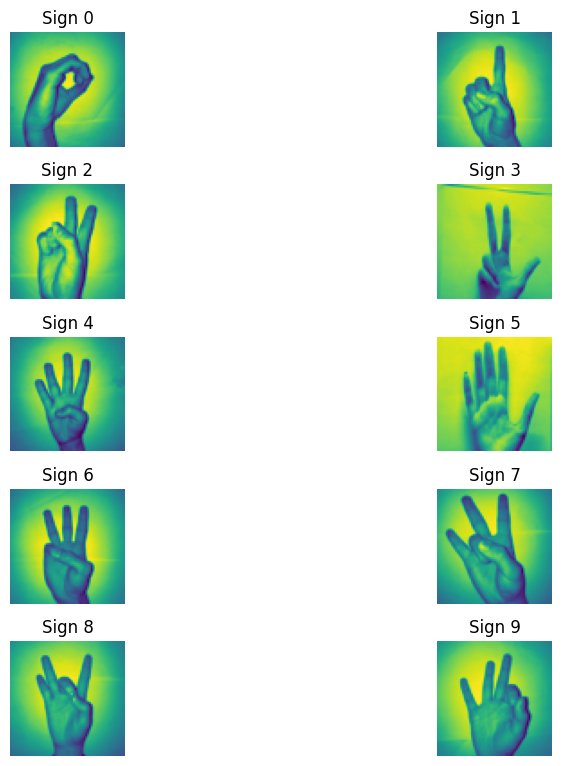

In [5]:
img_size = 64
fig,ax=plt.subplots(nrows =5,ncols=2,figsize = (10,8))
j = 0
k = 0
for i in range(10):
    if i == 0:
        j = 0
        k = 0
    elif i%2 == 0:
        j = j + 1
        k = 0
    else:
        k = k + 1
    ax = plt.subplot2grid((5,2),(j,k))
    fig.tight_layout()
    ax.imshow(X[[260,900,1800,1600,1400,2061,700,500,1111,100]][i].reshape(img_size, img_size))
    plt.axis('off')
    title = "Sign " + str(i)
    plt.title(title)
plt.show()

### Scaling & Creating Dataframe for X and Y

Scaling is important for Principal Component Analysis (PCA) because PCA is sensitive to the variances of the features. 

1. PCA aims to identify the directions (principal components) along which the variation in the data is maximized. These directions are the eigenvectors of the covariance matrix of the data, and the amount of variance each direction explains is given by the corresponding eigenvalue.

2. The covariance matrix is used to calculate the principal components. If the features have different scales, the covariance matrix will be dominated by the features with larger scales, leading to biased principal components.

3. Dividing by 255 when scaling image vectors is a common normalization technique in image processing and machine learning.
    1. Digital images are typically represented as matrices of pixel values.
    2. For 8-bit grayscale images, pixel values range from 0 to 255.
    3. For 8-bit per channel RGB images, each channel (red, green, and blue) has values ranging from 0 to 255.

In [6]:
# Scaling
x_scaled = X / 255
df = pd.DataFrame(x_scaled.reshape(len(X),64*64))
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.001830,0.001861,0.001876,0.001892,0.001907,0.001922,0.001938,0.001938,0.001984,0.002015,...,0.002307,0.002353,0.002307,0.002261,0.002199,0.002168,0.002138,0.002076,0.002045,0.001999
1,0.002338,0.002384,0.002430,0.002476,0.002522,0.002537,0.002584,0.002614,0.002676,0.002722,...,0.001830,0.001784,0.001738,0.001692,0.001646,0.001630,0.001553,0.001522,0.001492,0.001461
2,0.002307,0.002368,0.002430,0.002476,0.002522,0.002568,0.002614,0.002676,0.002753,0.002784,...,0.001184,0.001692,0.001738,0.001722,0.001692,0.001661,0.001615,0.001584,0.001569,0.001522
3,0.002184,0.002230,0.002291,0.002353,0.002399,0.002430,0.002461,0.002507,0.002568,0.002599,...,0.001722,0.001692,0.001646,0.001615,0.001584,0.001553,0.001507,0.001476,0.001461,0.001446
4,0.002276,0.002261,0.002322,0.002384,0.002414,0.002491,0.002522,0.002537,0.002584,0.002630,...,0.002030,0.001984,0.001953,0.001922,0.001861,0.001830,0.001799,0.001769,0.001738,0.001707


In [7]:
df_y = pd.DataFrame(Y)
df_y.head(5)

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Manual Calaculation to display Covariance and Eigen Vectors

In [8]:
x_covar = np.cov(df.T)
x_covar

array([[1.82136638e-07, 1.79117815e-07, 1.75866313e-07, ...,
        1.09438021e-07, 1.11150256e-07, 1.13095565e-07],
       [1.79117815e-07, 1.77701265e-07, 1.74950033e-07, ...,
        1.06455617e-07, 1.08113219e-07, 1.09974616e-07],
       [1.75866313e-07, 1.74950033e-07, 1.73443054e-07, ...,
        1.03669110e-07, 1.05294388e-07, 1.07092300e-07],
       ...,
       [1.09438021e-07, 1.06455617e-07, 1.03669110e-07, ...,
        1.48459886e-07, 1.48736028e-07, 1.49688352e-07],
       [1.11150256e-07, 1.08113219e-07, 1.05294388e-07, ...,
        1.48736028e-07, 1.49990142e-07, 1.51216038e-07],
       [1.13095565e-07, 1.09974616e-07, 1.07092300e-07, ...,
        1.49688352e-07, 1.51216038e-07, 1.53061757e-07]])

In [9]:
x_eig_val,x_eig_vec = np.linalg.eig(x_covar)

In [10]:
tot = sum(x_eig_val)
var_exp = [(i/tot) * 100 for i in sorted(x_eig_val,reverse=True)]

### Cummulative sum to check important features required for prediction i.e till the cummulative sum reaches 100% 

In [11]:
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([ 12.00026394+0.00000000e+00j,  19.08059519+0.00000000e+00j,
        23.38431105+0.00000000e+00j, ..., 100.        +6.50027313e-17j,
       100.        +0.00000000e+00j, 100.        +0.00000000e+00j])

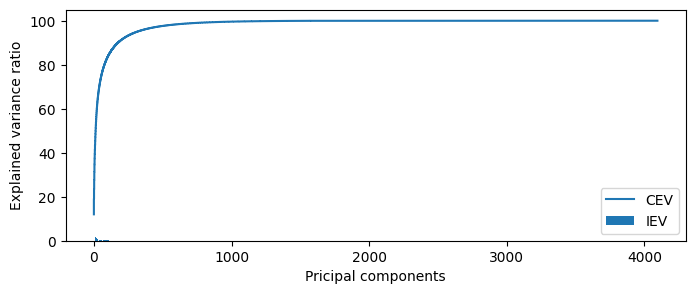

In [12]:
plt.figure(figsize=(8,3))
plt.step(range(len(cum_var_exp)),cum_var_exp,label='CEV')
plt.bar(range(len(var_exp)),var_exp,label='IEV')
plt.ylabel('Explained variance ratio')
plt.xlabel('Pricipal components')
plt.legend()
plt.show()

### Mapping the 9 different class targets to single class, so that it can be fir into the Model

In [13]:
df_y['target'] = np.nan
for i in range(0,10):
  df_y.loc[df_y[i] == 1.0,['target']] =   i

In [14]:
df_y['target'].value_counts()

target
5.0    208
3.0    207
6.0    207
9.0    207
2.0    206
4.0    206
7.0    206
8.0    206
1.0    205
0.0    204
Name: count, dtype: int64

In [15]:
df_y

,0,1,2,3,4,5,6,7,8,9,target
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0
2058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0
2059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0
2060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0


### Visualizing the Scaled Images

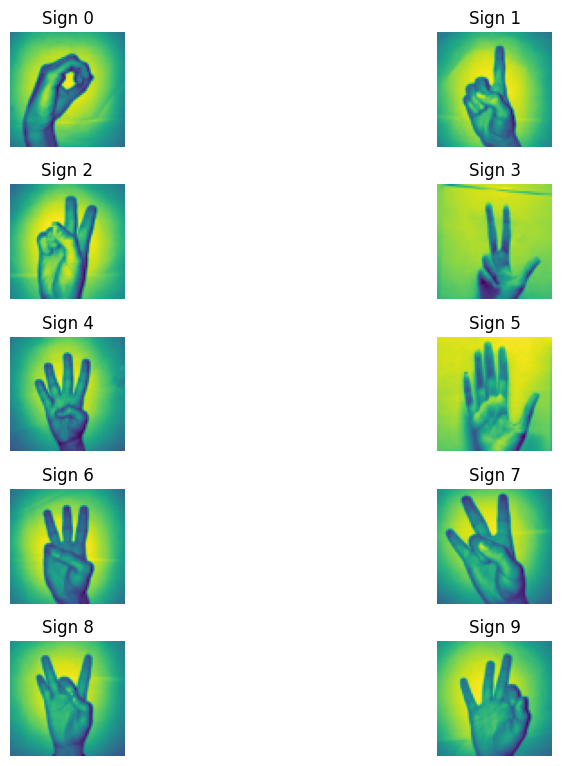

In [16]:
fig,ax=plt.subplots(nrows =5,ncols=2,figsize = (10,8))
j = 0
k = 0
img_size = 64
for i in range(10):
    if i == 0:
        j = 0
        k = 0
    elif i%2 == 0:
        j = j + 1
        k = 0
    else:
        k = k + 1
    ax = plt.subplot2grid((5,2),(j,k))
    fig.tight_layout()
    plt.imshow(x_scaled[[260,900,1800,1600,1400,2061,700,500,1111,100]][i].reshape(img_size, img_size))
    plt.axis('off')
    title = "Sign " + str(i)
    plt.title(title)
plt.show()

### Setting the X and Y 

In [17]:
X_col = df
Y_col = df_y['target']

### Splitting the data into train and test

In [18]:
X_train, X_test, y_train,y_test = train_test_split (X_col,Y_col,test_size = 0.2 ,random_state = 42)

In [19]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((1649, 4096), (1649,), (413, 4096), (413,))

### Creating Base Model to find no. of features which is sufficient for prediction

In [20]:
model_pca = PCA()
model_pca.fit(X_train)
pca_cumsum = np.cumsum(model_pca.explained_variance_ratio_)
d = np.argmax(pca_cumsum >= 0.95) + 1

In [21]:
print(f"Number of components needed to explain 95% variance: {d}")

Number of components needed to explain 95% variance: 301


### Designing a new model with selected 301 features

In [22]:
model_pca_reduced = PCA(n_components=d)
x_reduced = model_pca_reduced.fit_transform(X_train)
X_recovered = model_pca_reduced.inverse_transform(x_reduced) # to revert back to original images inorder to visualize them
x_test_reduced = model_pca_reduced.transform(X_test)

In [23]:
x_reduced.shape,y_train.shape,X_test.shape,y_test.shape,x_test_reduced.shape

((1649, 301), (1649,), (413, 4096), (413,), (413, 301))

### Visualizing the PCA reduced dimension images

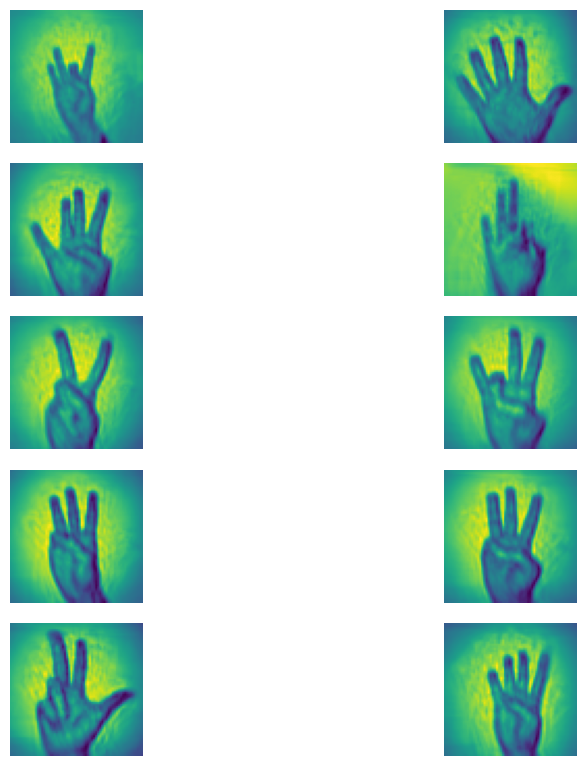

In [24]:
fig,ax=plt.subplots(nrows =5,ncols=2,figsize = (10,8))
j = 0
k = 0
for i in range(10):
    if i == 0:
        j = 0
        k = 0
    elif i%2 == 0:
        j = j + 1
        k = 0
    else:
        k = k + 1
    ax = plt.subplot2grid((5,2),(j,k))
    fig.tight_layout()
    plt.imshow(X_recovered[i].reshape(64,64))
    plt.axis('off')
plt.show()

### Building the Support Vector Model based on PCA components

In [25]:
model_svc = SVC()
model_svc.fit(x_reduced,y_train)

SVC()

### Prediction

In [26]:
y_pred = model_svc.predict(x_test_reduced)

### Model Evaluation

In [27]:
accuracy_score(y_test,y_pred)

0.8595641646489104

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96        40
         1.0       0.92      0.92      0.92        48
         2.0       0.74      0.84      0.79        50
         3.0       0.71      0.83      0.76        35
         4.0       0.90      0.84      0.87        32
         5.0       0.87      0.87      0.87        38
         6.0       0.81      0.71      0.75        41
         7.0       1.00      0.92      0.96        38
         8.0       0.85      0.76      0.80        45
         9.0       0.91      0.93      0.92        46

    accuracy                           0.86       413
   macro avg       0.87      0.86      0.86       413
weighted avg       0.86      0.86      0.86       413



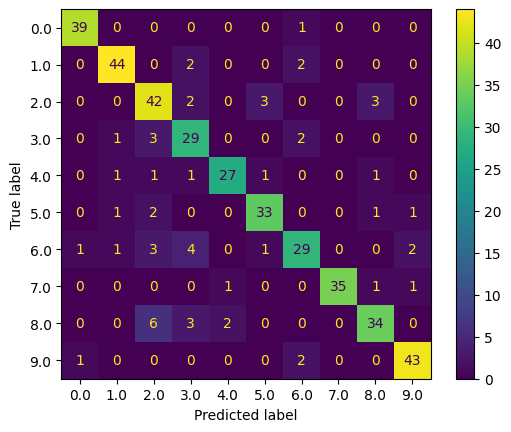

In [29]:
c_mat = confusion_matrix(y_test,y_pred)
display = ConfusionMatrixDisplay(c_mat,display_labels=model_svc.classes_)
display.plot()

In [30]:
y_pred

array([3., 9., 3., 9., 0., 5., 8., 2., 5., 9., 4., 9., 7., 1., 2., 3., 0.,
       5., 0., 7., 0., 2., 3., 1., 9., 2., 7., 3., 5., 9., 8., 5., 4., 6.,
       4., 6., 3., 1., 9., 2., 7., 7., 1., 1., 1., 2., 0., 7., 8., 9., 1.,
       9., 2., 2., 1., 0., 6., 8., 8., 8., 2., 7., 2., 7., 5., 9., 2., 2.,
       9., 4., 1., 1., 5., 7., 4., 9., 9., 5., 3., 8., 2., 9., 2., 0., 0.,
       0., 0., 4., 1., 2., 5., 8., 7., 4., 7., 4., 2., 2., 8., 9., 2., 0.,
       9., 0., 2., 1., 8., 8., 8., 7., 5., 8., 3., 3., 2., 3., 6., 1., 2.,
       5., 5., 0., 1., 5., 8., 2., 6., 5., 1., 0., 3., 1., 9., 9., 8., 3.,
       8., 9., 5., 8., 2., 6., 2., 6., 6., 1., 6., 2., 5., 4., 9., 2., 1.,
       2., 6., 2., 6., 6., 1., 1., 4., 5., 9., 8., 3., 2., 4., 7., 6., 9.,
       3., 7., 2., 9., 1., 3., 7., 6., 0., 2., 1., 7., 4., 2., 1., 6., 3.,
       2., 4., 8., 8., 6., 8., 3., 2., 0., 8., 3., 8., 1., 2., 7., 0., 2.,
       2., 4., 2., 5., 8., 8., 9., 0., 2., 8., 5., 3., 1., 3., 5., 0., 6.,
       4., 6., 1., 7., 5.

In [31]:
np.array(y_test)

array([6., 9., 3., 9., 0., 5., 8., 2., 5., 9., 4., 9., 7., 1., 3., 3., 0.,
       5., 0., 7., 0., 8., 3., 6., 9., 2., 7., 3., 5., 9., 8., 5., 4., 6.,
       4., 6., 3., 1., 9., 2., 7., 7., 3., 1., 1., 2., 0., 7., 8., 9., 1.,
       9., 6., 2., 1., 0., 6., 8., 2., 8., 8., 7., 2., 7., 5., 9., 2., 3.,
       6., 4., 1., 1., 5., 7., 4., 9., 9., 4., 3., 8., 8., 9., 2., 0., 9.,
       0., 0., 4., 1., 5., 5., 4., 7., 4., 7., 4., 2., 2., 8., 7., 2., 0.,
       9., 0., 2., 1., 7., 8., 8., 7., 2., 8., 3., 3., 2., 2., 6., 1., 5.,
       5., 5., 0., 1., 5., 8., 2., 6., 5., 1., 0., 3., 1., 9., 9., 8., 3.,
       8., 9., 2., 2., 2., 6., 2., 6., 6., 1., 6., 2., 5., 4., 9., 2., 1.,
       2., 6., 2., 6., 6., 1., 1., 7., 5., 9., 8., 6., 2., 4., 7., 6., 9.,
       8., 7., 2., 9., 1., 6., 7., 6., 0., 6., 1., 7., 4., 8., 4., 3., 2.,
       2., 4., 2., 8., 6., 8., 3., 2., 0., 8., 8., 8., 5., 4., 7., 0., 8.,
       2., 4., 2., 5., 5., 8., 9., 0., 2., 8., 5., 3., 1., 3., 5., 0., 6.,
       4., 6., 1., 7., 5.

### Model Metrics

In [32]:
print(f'Gamma:{model_svc.gamma}') # represents the flexibility of the hyperplane 
print(f'Kernel:{model_svc.kernel}') # Method to seperate the classes which are not linearily seperable
print(f'C:{model_svc.C}') # How many errors model can consider- Regularization

Gamma:scale
Kernel:rbf
C:1.0
